In [413]:
import pandas as pd
import numpy as np

In [414]:
df = pd.read_csv("spam.csv", encoding="latin1")

In [415]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5147,spam,Get your garden ready for summer with a FREE s...,NaN,NaN,NaN
3063,ham,Ok. How many should i buy.,NaN,NaN,NaN
4935,ham,K..k.:)congratulation ..,NaN,NaN,NaN
1110,ham,Ok ill tell the company,NaN,NaN,NaN
1105,ham,on hen night. Going with a swing,NaN,NaN,NaN
3110,ham,Short But Cute : \ Be a good person,"but dont try to prove\"" ..... Gud mrng...""",NaN,NaN
3136,ham,You're right I have now that I think about it,NaN,NaN,NaN
2362,ham,How are you doing? Hope you've settled in for ...,NaN,NaN,NaN
1797,ham,Can i get your opinion on something first?,NaN,NaN,NaN
891,ham,I am great princess! What are you thinking abo...,NaN,NaN,NaN


In [416]:
df.shape

(5572, 5)

In [417]:
# steps in project
# 1.Data cleanising
# 2.EDA
# 3.Text preprocessing - vectorization, stemming
# 4.Model building
# 5.Evaluation
# 6.Improvement
# 7.Website
# 8.Deployment on heroku

## 1. Data cleaning

In [418]:
# checking if last 3 columns has something or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [419]:
# last 3 column has less values so droping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [420]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [421]:
# renaming the column name
df.rename(columns={'v1' : 'target', 'v2' : 'text'}, inplace=True)
df.sample(5)

,target,text
3854,spam,Free msg: Single? Find a partner in your area!...
2036,ham,You can jot down things you want to remember l...
130,ham,I'm home.
2876,ham,twenty past five he said will this train have ...
326,ham,Hi da:)how is the todays class?


In [422]:
# instead of 'ham' & 'spam' replace it with 1 or 0 it will be done by label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [423]:
df['target'] = encoder.fit_transform(df['target'])

In [424]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [425]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [426]:
# check for duplicated values
df.duplicated().sum()

403

In [427]:
# reomove dupicate values
df = df.drop_duplicates(keep='first')

In [428]:
df.duplicated().sum()
# deleted all duplicate values

0

In [429]:
df.shape

(5169, 2)

## 2. EDA

In [430]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [431]:
# see how many spam and ham values are there
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

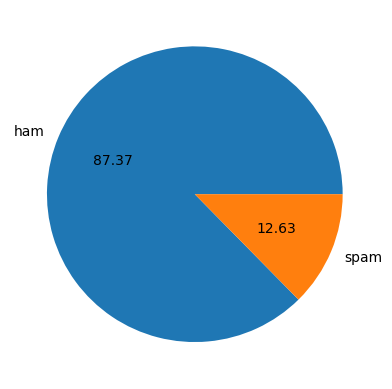

In [432]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [433]:
# data is imbalanced

In [434]:
# to go deeper analysis we will make 3 more new columns one for alphabet, word & sentence to do that 
# there is a library NLTK (Naturak language tool kit)
!pip install nltk

In [435]:
import nltk

In [436]:
# download necessary files to perform some actions
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/pathakji/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [437]:
# we will make 3 more new columns one for alphabet, word & sentence
df['num_characters'] = df['text'].apply(len)
# number of characters in each message

In [438]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [439]:
# number of words
# df['text'].apply(lambda x : nltk.word_tokenize(x)) on this use len to count the number of words
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [440]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [441]:
# number of sentences
# df['text'].apply(lambda x : nltk.sent_tokenize(x)) this will give number of sentence use len to get the number
df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [442]:
# new features have been added
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [443]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [444]:
# describe for ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [445]:
# describe for spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [446]:
import seaborn as sns

/Users/pathakji/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pathakji/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

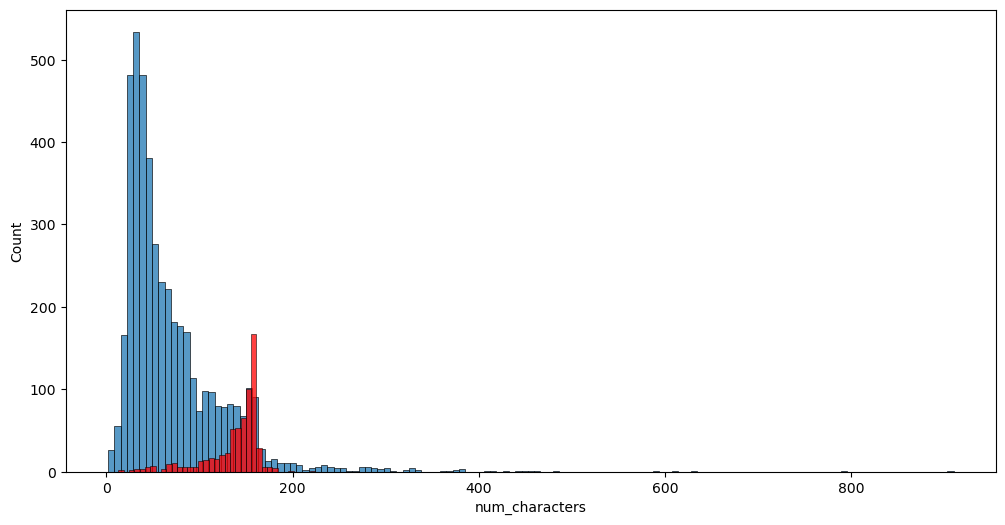

In [447]:
# number of characters in ham and spam on graph

plt.figure(figsize=(12,6))
# ham graph blue color
sns.histplot(df[df['target'] == 0]['num_characters'])

# spam graph in red color
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

/Users/pathakji/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pathakji/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

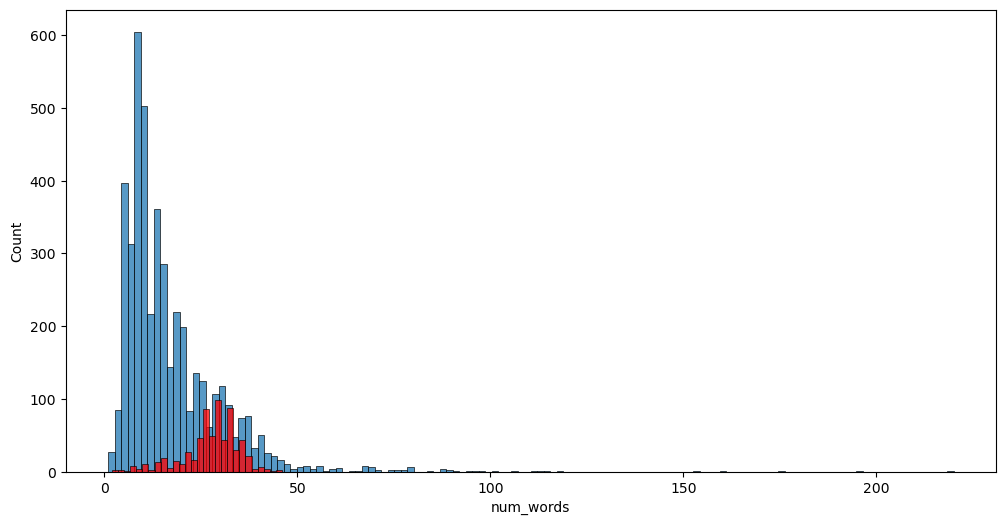

In [448]:
# number of words in ham and spam on graph

plt.figure(figsize=(12,6))
# ham graph blue color
sns.histplot(df[df['target'] == 0]['num_words'])

# spam graph in red color
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

/Users/pathakji/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pathakji/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_sentences', ylabel='Count'>

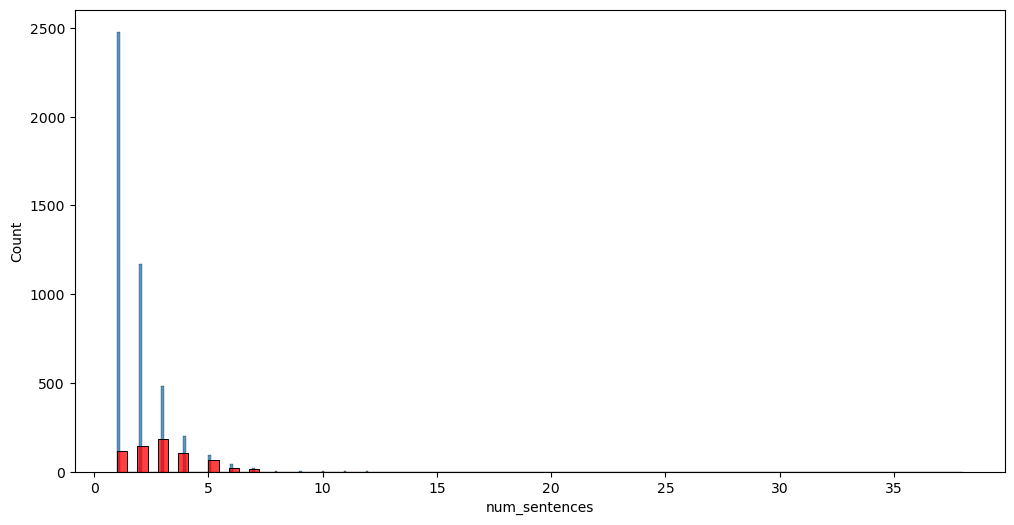

In [449]:
# number of sentences in ham and spam on graph

plt.figure(figsize=(12,6))
# ham graph blue color
sns.histplot(df[df['target'] == 0]['num_sentences'])

# spam graph in red color
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

/Users/pathakji/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pathakji/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pathakji/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pathakji/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args,

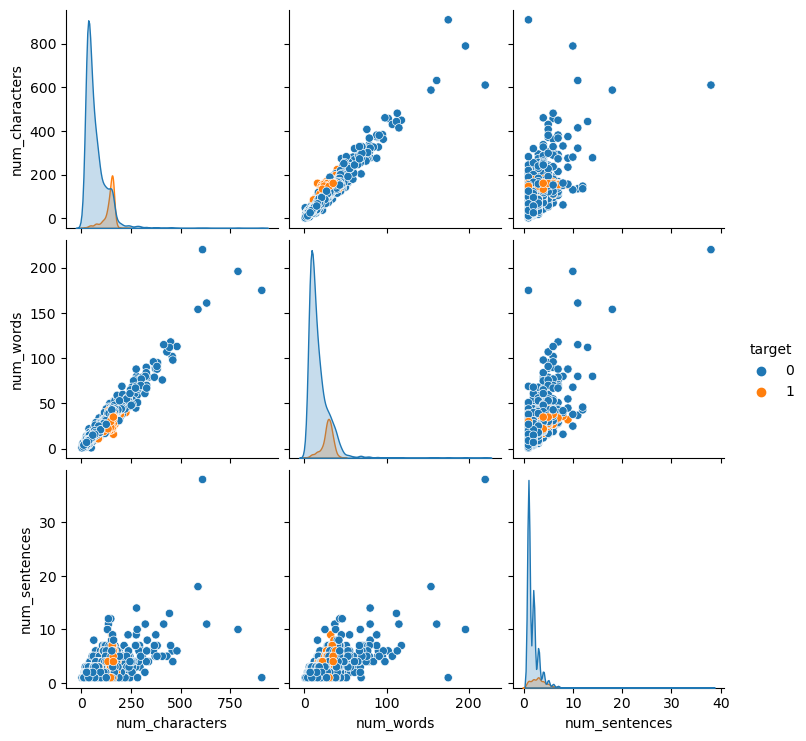

In [450]:
sns.pairplot(df, hue='target')

# there are some outliers in the data 

In [300]:
# Since these 3 columns are very closely related to each other so we will take only num_character column 

# 3. Data preprocessing
    a) Lower case
    b) Tokenization
    c) Removing special characters
    d) Removing stop words and punctuation
    e) stemming :- it will group same kind of words e.g dance, dancing, danced afterall they all have same meaning

In [451]:
# final function doing all the 5 steps
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [452]:
transform_text('Hi How Are 20% You')
# % percent is not added to the list

'hi 20'

In [453]:
transform_text('Hi How Are %% @darsh You')
# special charcater % & @ is not added to the list

'hi darsh'

In [454]:
# stop words are those which doesnt give meaning to sentence just used for sentence formation 
# in nltk learn corpus library has all stopwords

from nltk.corpus import stopwords
nltk.download('stopwords')
# all stopwords in english
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pathakji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [455]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [456]:
# check for stopwords or punctuation
transform_text('Hi How are you Adarsh?')
# only hi & adarsh came because stopwords and punctuation removed

'hi adarsh'

In [457]:
transform_text('Did you like my presentation in ML?')

'like present ml'

### stemming

In [458]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('detection')
# try loving, dancing etc to get the root word

'detect'

In [459]:
# check for stemming
transform_text('I loved the lectures on machine Learning. what about you?')

'love lectur machin learn'

In [460]:
df['transformed_text'] = df['text'].apply(transform_text)

In [461]:
df.head()
# every sentences has no stopword or punctuation or stemming
# now we will use transformed text

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Word cloud to focus on which words use most time on ham & spam


In [462]:
!pip install wordcloud

In [463]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [464]:
#spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
#wordcloud = WordCloud().generate(text)
spam_wc = WordCloud().generate(df[df['target'] == 1]['transformed_text'].to_string())

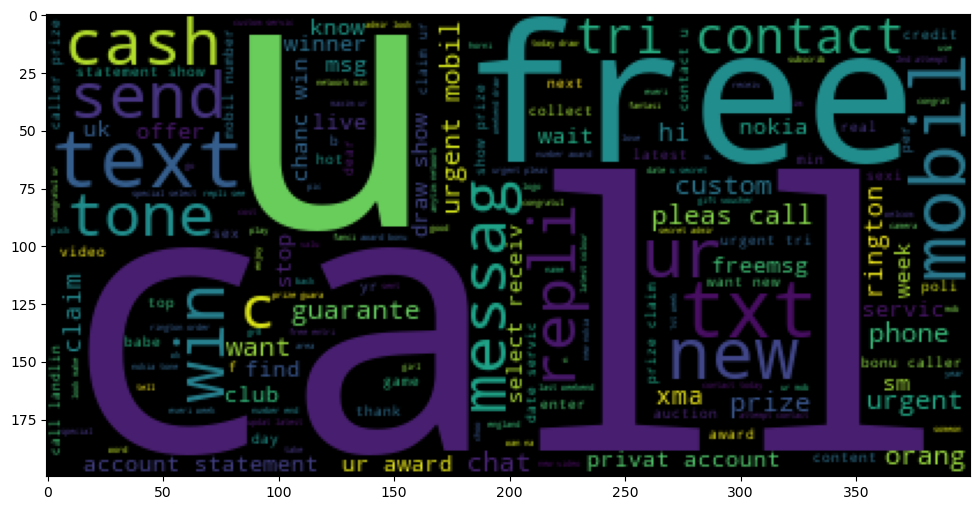

In [465]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [466]:
# wordcloud for ham
ham_wc = WordCloud().generate(df[df['target'] == 0]['transformed_text'].to_string())

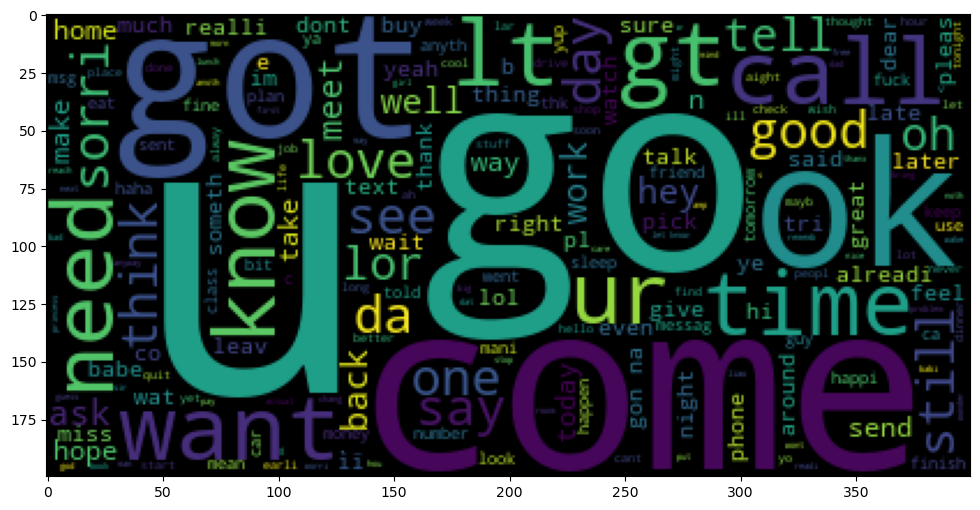

In [467]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [468]:
# top 30 words in ham and spam messages
        
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    spam_corpus.extend(msg)


In [469]:
# total number of words in spam
len(spam_corpus)

56319

In [470]:
# this library will count of every word that is in spam message
from collections import Counter
Counter(spam_corpus)

Counter({' ': 9286,
         'e': 4144,
         't': 3388,
         'a': 3125,
         'r': 2770,
         'o': 2764,
         'i': 2758,
         'l': 2589,
         'n': 2421,
         'c': 2223,
         's': 1833,
         '0': 1753,
         'p': 1577,
         'm': 1379,
         'd': 1303,
         'u': 1210,
         '2': 846,
         'h': 845,
         '1': 838,
         '8': 830,
         'g': 830,
         'w': 815,
         'b': 752,
         'x': 710,
         'f': 660,
         'k': 559,
         '5': 550,
         '7': 547,
         'v': 525,
         '4': 517,
         '6': 480,
         '3': 470,
         '9': 414,
         'y': 332,
         'z': 136,
         'j': 69,
         'q': 65,
         'å': 3,
         'ò': 2,
         'á': 1})

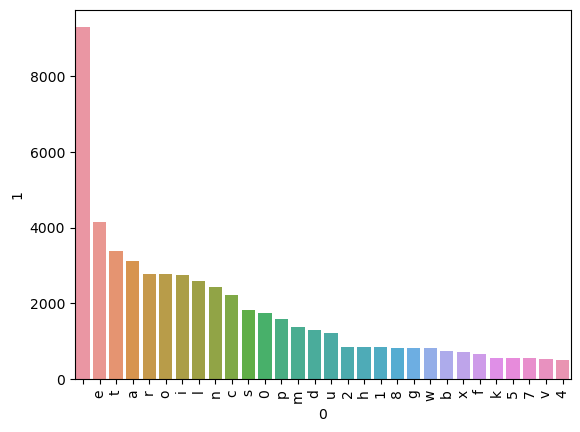

In [471]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [472]:
# for ham top 30 words
        
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    ham_corpus.extend(msg)

In [473]:
len(ham_corpus)

177016

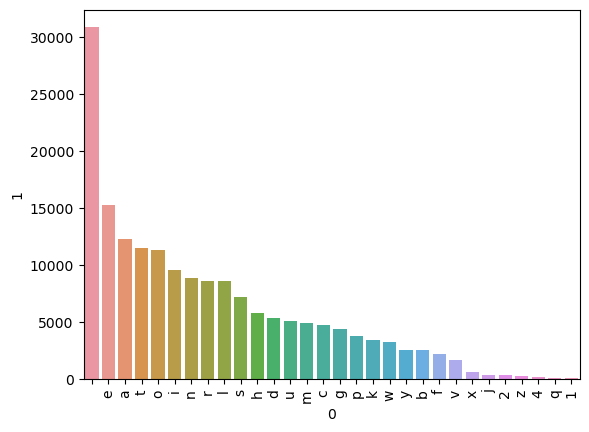

In [474]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model building

First we will apply Naive bayes because it gove good output for textual data

transformed text is in english so we need to cover it in number using 3 methods :- Bag of words, tfidf, word embedding


First we will vectorize using bag of words(collection of words) and then train the model using naive bayes

In [476]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

# Join the lists of words into strings
transformed_texts_as_strings = [' '.join(words) for words in df['transformed_text']]

# instead of Countvectorizer I will go with tfidf cause it gives good precision
# X = cv.fit_transform(transformed_texts_as_strings).toarray()




In [478]:
# Fit and transform the data
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# Since scaling doesnot improve the score so no use
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [479]:
X.shape

(5169, 3000)

In [480]:
y = df['target'].values

In [481]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [482]:
from sklearn.model_selection import train_test_split

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [484]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [485]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [486]:
# for Gaussian Naive Bayes
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [490]:
# for Multinomial Naive Bayes
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [488]:
# for Bernoulli Naive Bayes
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

# bernoulli is giviing best output till now

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### Multinomial & Bernoulli is good but multinomial has good precision no mistakes

In [336]:
# tfidf --> MNB

In [382]:
!pip3 install xgboost

In [383]:
# compare different models with MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [384]:
# objects for every ML model
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state = 2)
abc = AdaBoostClassifier(n_estimators=50, random_state = 2)
bc  = BaggingClassifier(n_estimators=50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators=50, random_state = 2)
gbdt= GradientBoostingClassifier(n_estimators=50, random_state = 2)
xgb = XGBClassifier(n_estimators=50, random_state = 2)

In [385]:
# dictionary for object
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [386]:
# function for each 
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [387]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [388]:
# storing all models accuracy & precision in one dataframe
 
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  Bgc
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [389]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [391]:
performance_df
# Naive bayes has good precision which we want and also good score

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,Bgc,0.958414,0.868217


In [392]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm") 

In [393]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,Bgc,Accuracy,0.958414


/Users/pathakji/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


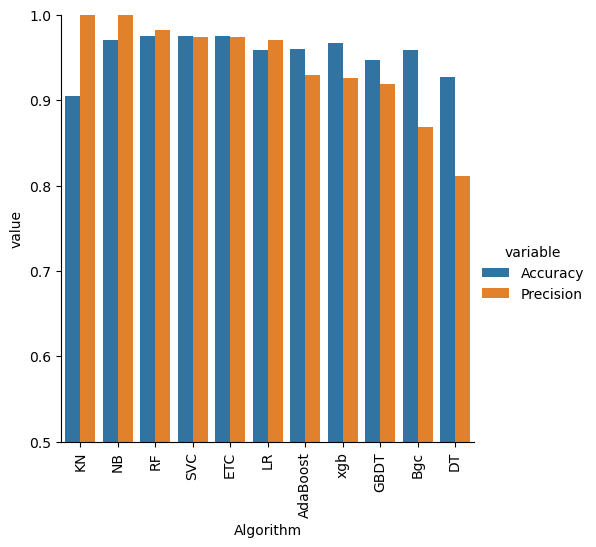

In [394]:
sns.catplot(x= 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind='bar', height=5)

plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()


In [395]:
# model improvement
# 1. Change the max_features parameter of TfIdf

In [396]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [397]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [400]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [401]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [403]:
new_df_scaled.merge(temp_df,on='Algorithm')
# only focus till this column "Precision_max_ft_3000"

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_num_chars_x,Precision_num_chars_x,Accuracy_num_chars_y,Precision_num_chars_y
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,Bgc,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


## Also checking Voting Classifier

In [404]:
# Voting Classifier :- It is a combination of 3 models
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [405]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [406]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [407]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

# accuracy is good then NB but precision is less than 1 which is not acceptable so we will go with "MultinomialNB"

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [408]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [409]:
from sklearn.ensemble import StackingClassifier

In [410]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [411]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


### In making pipeline only 3 steps required data preprocess, vectorize and model training

In [491]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))